По адресу https://goo.gl/STWRi3 расположен временной ряд за несколько лет.
- Используйте любой инструмент для дата майнинга (можно даже ту же самую электронную таблицу).
- Найдите закономерности в представленном временном ряду, если они есть.
- Сделайте прогноз по тренду.
- Напишите краткий отчёт об исследовании и пришлите преподавателю ссылку на него.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('./time_series.csv')
df

,Дата,Значение
0,01.05.2014,0
1,02.05.2014,10
2,03.05.2014,0
3,04.05.2014,0
4,05.05.2014,0
...,...,...
1456,26.04.2018,1
1457,27.04.2018,2
1458,28.04.2018,1
1459,29.04.2018,1


<AxesSubplot: >

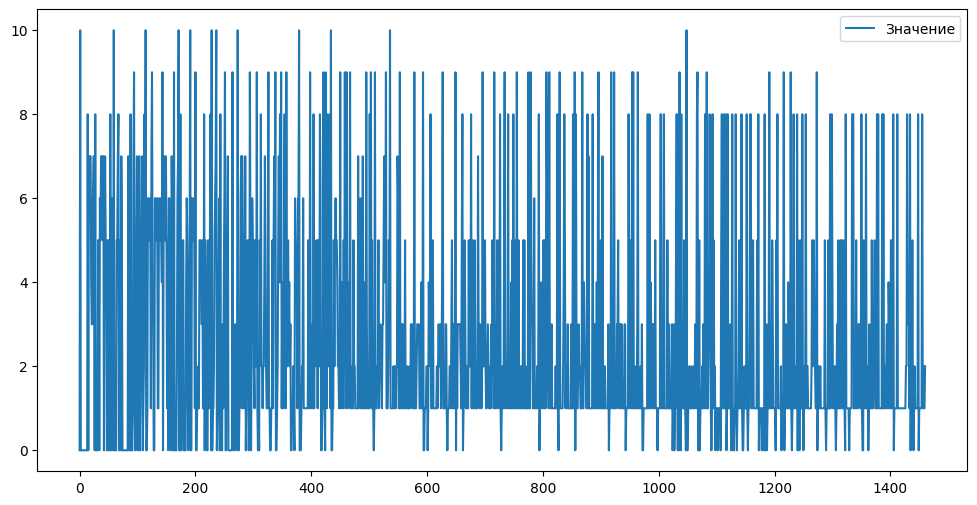

In [27]:
df.plot(figsize=(12,6))

,Значение
count,1461.000000
mean,2.619439
std,2.624230
min,0.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,10.000000


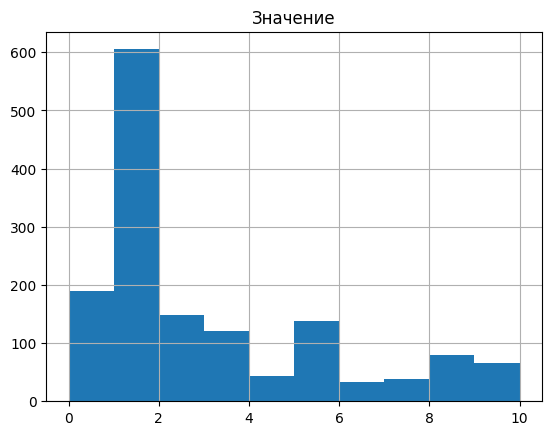

In [28]:
itog = df.describe()
df.hist()
itog

Стационарность временных рядов

Стационарность — одно из важнейших свойств временных рядов. Стационарный ряд — это ряд, в котором статистические характеристики, такие как среднее и дисперсия, остаются постоянными во времени. Это свойство позволяет нам строить надежные модели и прогнозировать будущие значения.


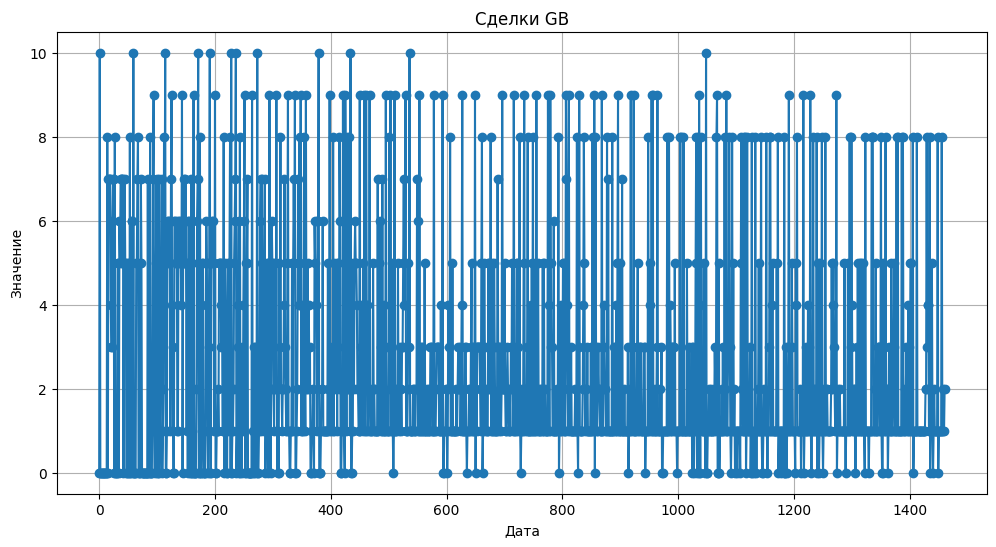

In [29]:
# Построим график продаж
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Значение'], marker='o', linestyle='-')
plt.title('Сделки GB')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

In [30]:
# Обработка пропущенных значений (если они есть)
df.dropna(inplace=True)

# Проверка стационарности ряда
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Значение'])
print('ADF статистика:', result[0])
print('p-значение:', result[1])
print('Критические значения:')
for key, value in result[4].items():
    print(f'  {key}: {value}')

ADF статистика: -38.31485742676627
p-значение: 0.0
Критические значения:
  1%: -3.434836872962171
  5%: -2.863521656701378
  10%: -2.567825016419591



Если p-значение ниже некоторого порогового значения (обычно 0.05), то мы можем считать ряд стационарным.

После подготовки данных мы можем выбрать и обучить модель для прогнозирования. Для этого примера мы будем использовать модель ARIMA.


In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Обучение модели ARIMA
model = ARIMA(df['Значение'], order=(1, 1, 1))
model_fit = model.fit()

# Вывод статистики модели
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Значение   No. Observations:                 1461
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3472.168
Date:                Fri, 09 Feb 2024   AIC                           6950.335
Time:                        14:42:15   BIC                           6966.194
Sample:                             0   HQIC                          6956.251
                               - 1461                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0230      0.027     -0.863      0.388      -0.075       0.029
ma.L1         -0.9933      0.005   -211.518      0.000      -1.003      -0.984
sigma2         6.7906      0.307     22.091      0.0

Теперь, когда модель обучена и ее качество оценено, мы можем использовать ее для прогнозирования будущих значений.


In [35]:
# Прогноз на будущее (следующие 12 месяцев)
forecast_future = model_fit.forecast(steps=12)

# Создаем новый DataFrame для будущих значений
future_dates = pd.date_range(start='2019-01-01', periods=12, freq='M')
forecast_df = pd.DataFrame({'Дата': future_dates, 'Прогноз значений': forecast_future})



Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\ramze\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\indexes\base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "pandas\_libs\index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5753, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Прогноз значений'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\ramze\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ramze\AppDat

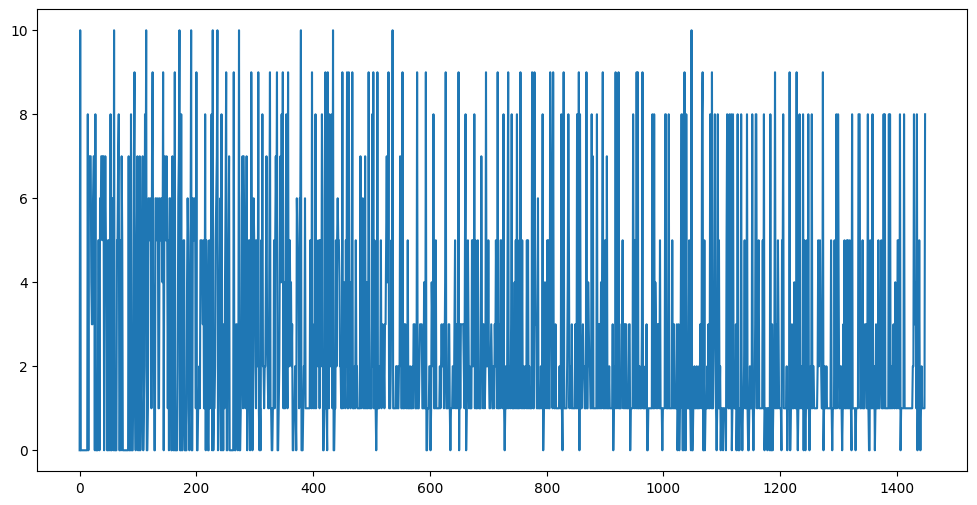

In [36]:
# Визуализация исходных данных и прогноза
plt.figure(figsize=(12, 6))
plt.plot(df.index[:-12], df['Значение'][:-12], label='Исходные данные')
plt.plot(df.index[-12:], df['Прогноз значений'][-12:], label='Прогноз')
plt.title('Прогноз сделок GB')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()